In [54]:
# Brain Tumor Detection - Pituitary Tumor

### Load Modules

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [56]:
import os

path = os.listdir('/content/sample_data/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [57]:
import cv2
X = []
Y = []
for cls in classes:

    pth = '/content/sample_data/Training/'+ cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [58]:
X = np.array(X)
Y = np.array(Y)

In [59]:
np.unique(Y)

array([0, 1])

In [60]:
pd.Series(Y).value_counts()

,count
1,827
0,395


In [61]:
X.shape

(1222, 200, 200)

### Visualize data

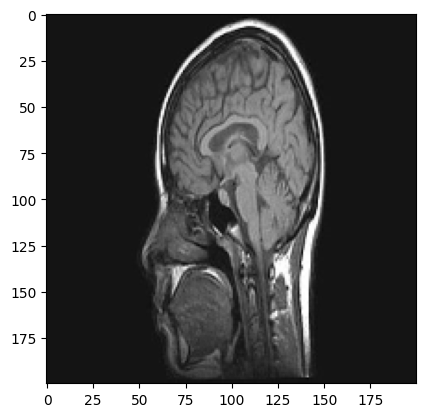

In [62]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [63]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [65]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [66]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [67]:
from sklearn.decomposition import PCA

In [68]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


### Train Model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [70]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1)

In [71]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

### Evaluation

In [72]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9469387755102041


In [73]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.963265306122449


### Prediction

In [74]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  4,  20,  63,  65, 111, 117, 138, 158, 210]),)

In [75]:
pred[36]

1

In [76]:
ytest[36]

1

### TEST MODEL

In [77]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [78]:
!pip install opencv-python

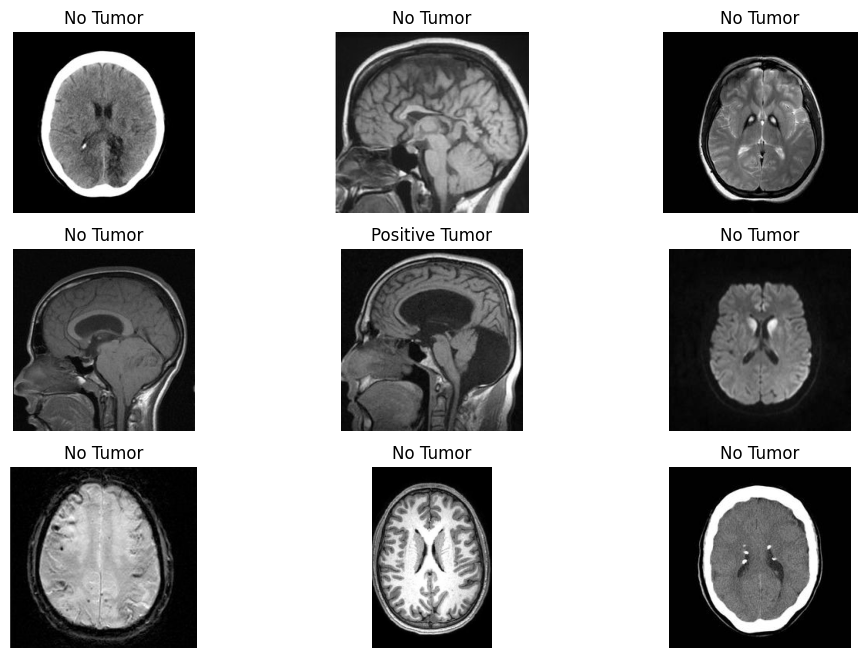

In [80]:


import cv2
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC

dec = {0:'No Tumor', 1:'Positive Tumor'}
plt.figure(figsize=(12,8))
p = os.listdir('/content/sample_data/Testing')
c=1
for i in os.listdir('/content/sample_data/Testing/no_tumor')[:9]:
    plt.subplot(3,3,c)

    # Add a '/' between the directory and filename
    img = cv2.imread('/content/sample_data/Testing/no_tumor/'+i,0)

    # Check if image was loaded successfully
    if img is not None:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c+=1
    else:
        print(f"Failed to load image: /content/sample_data/Testing/no_tumor/{i}")

In [ ]:


import cv2
import matplotlib.pyplot as plt

def predict_tumor(image_path):

  img = cv2.imread(image_path, 0)
  if img is None:
    return "Error: Could not load image."

  img1 = cv2.resize(img, (200, 200))
  img1 = img1.reshape(1, -1) / 255
  prediction = sv.predict(img1)  # Use the trained SVM model (sv)
  dec = {0: 'No Tumor', 1: 'Positive Tumor'}
  return dec[prediction[0]]


image_path = '/content/sample_data/Testing/pituitary_tumor/image(1).jpg'
result = predict_tumor(image_path)

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()


In [ ]:
image_path = '/content/sample_data/Testing/no_tumor/image(1).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/sample_data/Testing/no_tumor/image(10).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

In [ ]:
image_path ='/content/sample_data/Testing/pituitary_tumor/image(13).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

In [ ]:
image_path ='/content/sample_data/Testing/no_tumor/image(100).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

In [ ]:
image_path ='/content/sample_data/Testing/no_tumor/image(100).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

In [ ]:
image_path ='/content/sample_data/Training/pituitary_tumor/p (100).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()